In [1]:
import os
import time
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver 
from selenium.webdriver.common.by import By # This needs to be used 

In [2]:
from selenium import webdriver


product="anouk kurta"
# Define the path to the Chrome WebDriver executable

# Initialize the Chrome WebDriver
driver = webdriver.Chrome()

# Navigate to the URL
driver.get("https://www.myntra.com/kurta?rawQuery="+product)

# Wait for the page to load (you may need to adjust the waiting time)
# You can use WebDriverWait for this purpose.
# Example: WebDriverWait(driver, 10).until(lambda x: x.find_element_by_id("element_id").is_displayed())

# Once the page is loaded, you can extract the page's text
myntra_text = driver.page_source


myntra_html = bs(myntra_text, "html.parser")

'<html lang="en"><head><title>Kurta | Buy Kurta Online in India at Best Price</title><meta name="theme-color" content="#fffff"><link rel="dns-prefetch preconnect" href="https://constant.myntassets.com"><link rel="dns-prefetch preconnect" href="https://assets.myntassets.com"><link rel="dns-prefetch preconnect" href="https//www.googletagmanager.com"><link rel="dns-prefetch preconnect" href="https//www.google-analytics.com"><link rel="dns-prefetch preconnect" href="https//connect.facebook.net"><link rel="dns-prefetch preconnect" href="https://www.facebook.com"><link rel="dns-prefetch preconnect" href="https://touch.myntra.com"><link rel="manifest" href="/manifest.json"><link rel="search" type="application/opensearchdescription+xml" href="https://www.myntra.com/opensearch.xml" title="Myntra Fashion Search"><link rel="apple-touch-icon" href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png">\n      <link rel="preload" as="script" href="https://constant.myntassets.co
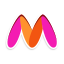

In [3]:
myntra_text

<html lang="en"><head><title>Kurta | Buy Kurta Online in India at Best Price</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon"/>
<link as="script" href="https://constant.myntassets.com/web/asset
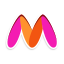

In [4]:
myntra_html

In [5]:
pclass=myntra_html.findAll("ul", {"class": "results-base"})
pclass[0]      

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\1366532846.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  pclass=myntra_html.findAll("ul", {"class": "results-base"})


<ul class="results-base"><li class="product-base" id="23119268"><div class="product-thumbShim"></div><div class="product-ratingsContainer"><span>4.2</span><span class="myntraweb-sprite product-starIcon index-productRatingsExcellentIcon sprites-productRatingsExcellentIcon"></span><div class="product-ratingsCount"><div class="product-separator">|</div><!-- react-text: 326 -->3.7k<!-- /react-text --></div></div><a data-refreshpage="true" href="kurtas/anouk/anouk-men-geometric-printed-cotton-indigo-short-kurta/23119268/buy" style="display: block;" target="_blank"><div class="product-imageSliderContainer"><div class="product-sliderContainer" style="display: block;"><div style="background: rgb(244, 255, 249);"><div style="height: 280px; width: 100%;"><picture class="img-responsive" draggable="false" style="width: 100%; height: 100%; display: block;"><source srcset="
    https://assets.myntassets.com/f_webp,dpr_1.0,q_60,w_210,c_limit,fl_progressive/assets/images/23119268/2023/5/19/402af633-1e

In [8]:
for i in pclass:
    href = i.find_all('a', href=True) # 'a' stands for anchor tag
    t=(href[0]['href'])
    
   
productLink = "https://www.myntra.com/"+ t
productLink

'https://www.myntra.com/kurtas/anouk/anouk-men-geometric-printed-cotton-indigo-short-kurta/23119268/buy'

In [10]:
# Re-initialize the Chrome WebDriver since the previous session was quit
driver = webdriver.Chrome()
driver.get(productLink)
prodRes = driver.page_source

<html lang="en"><head><style data-vjs-version="7.21.4" id="bc-style-vjs" type="text/css">@charset "UTF-8";.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.video-js .vjs-modal-dialog,.vjs-button>.vjs-icon-placeholder:before,.vjs-modal-dialog .vjs-modal-dialog-content{position:absolute;top:0;left:0;width:100%;height:100%}.video-js .vjs-big-play-button .vjs-icon-placeholder:before,.vjs-button>.vjs-icon-placeholder:before{text-align:center}@font-face{font-family:VideoJS;src:url(data:application/font-woff;charset=utf-8;base64,d09GRgABAAAAABDkAAsAAAAAG6gAAQAAAAAAAAAAAAAAAAAAAAAAAAAAAABHU1VCAAABCAAAADsAAABUIIslek9TLzIAAAFEAAAAPgAAAFZRiV3hY21hcAAAAYQAAADaAAADPv749/pnbHlmAAACYAAAC3AAABHQZg6OcWhlYWQAAA3QAAAAKwAAADYZw251aGhlYQAADfwAAAAdAAAAJA+RCLFobXR4AAAOHAAAABMAAACM744AAGxvY2EAAA4wAAAASAAAAEhF6kqubWF4cAAADngAAAAfAAAAIAE0AIFuYW1lAAAOmAAAASUAAAIK1cf1oHBvc3QAAA/AAAABJAAAAdPExYuNeJxjYGRgYOBiMGCwY2BycfMJYeDLSSzJY5BiYGGAAJA8MpsxJzM9kYEDxgPKsYBpDiBmg4gCACY7BUgAeJxjYGS7wTiBgZWBgaWQ5RkDA8MvC
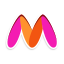

In [11]:
prodRes_html = bs(prodRes, "html.parser")
prodRes_html

In [12]:
title_h=prodRes_html.findAll("title") # used for filtering by using title tag
title=title_h[0].text
title

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\2728203142.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  title_h=prodRes_html.findAll("title") # used for filtering by using title tag


'Buy Anouk Men Geometric Printed Cotton Indigo Short Kurta  - Kurtas for Men 23119268 | Myntra'

In [13]:
overallRating=prodRes_html.findAll("div",{"class":"index-overallRating"})
overallRating
for i in overallRating:
    rating_value = i.find('div').text
print(rating_value)


4.2


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\1208185265.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  overallRating=prodRes_html.findAll("div",{"class":"index-overallRating"})


In [14]:
price=prodRes_html.findAll("span",{"class":"pdp-price"})
for i in price:
    p=i.text
print(p)

₹681


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\61606019.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  price=prodRes_html.findAll("span",{"class":"pdp-price"})


In [15]:
Reviews=prodRes_html.find("a",{"class":"detailed-reviews-allReviews"})
t2=Reviews['href']
Review_link="https://www.myntra.com"+t2
Review_link

'https://www.myntra.com/reviews/23119268'

In [16]:
driver.get(Review_link)
review_page= driver.page_source
driver.quit()

<html lang="en"><head><title>Review - Anouk Men Geometric Printed Cotton Indigo Short Kurta</title><meta content="#fffff" name="theme-color"/><link href="https://constant.myntassets.com" rel="dns-prefetch preconnect"/><link href="https://assets.myntassets.com" rel="dns-prefetch preconnect"/><link href="https//www.googletagmanager.com" rel="dns-prefetch preconnect"/><link href="https//www.google-analytics.com" rel="dns-prefetch preconnect"/><link href="https//connect.facebook.net" rel="dns-prefetch preconnect"/><link href="https://www.facebook.com" rel="dns-prefetch preconnect"/><link href="https://touch.myntra.com" rel="dns-prefetch preconnect"/><link href="/manifest.json" rel="manifest"/><link href="https://www.myntra.com/opensearch.xml" rel="search" title="Myntra Fashion Search" type="application/opensearchdescription+xml"/><link href="https://constant.myntassets.com/pwa/assets/img/Icon-App-60x60@3x_2021.png" rel="apple-touch-icon"/>
<link as="script" href="https://constant.myntasset
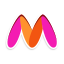

In [17]:
review_html = bs(review_page, "html.parser")
review_html


In [18]:
review=review_html.findAll("div",{"class":"detailed-reviews-userReviewsContainer"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\4034511439.py:1: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  review=review_html.findAll("div",{"class":"detailed-reviews-userReviewsContainer"})


In [19]:
review

[<div class="detailed-reviews-userReviewsContainer" id="detailedReviewsContainer"><div class="user-review-userReviewWrapper"><div class="user-review-main user-review-showRating"><div class="user-review-starWrapper"><span class="user-review-starRating user-review-fourStars"><!-- react-text: 132 -->4<!-- /react-text --><span class="user-review-starIcon"><svg height="10" viewbox="0 0 12 12" width="10" xmlns="http://www.w3.org/2000/svg"><path d="M6 9.644l2.867 1.821c.464.296.743.093.623-.45L8.724 7.56l2.581-2.657c.384-.395.25-.716-.306-.716H7.686L6.374.93c-.206-.513-.542-.512-.748 0L4.314 4.187H1.001c-.553 0-.687.324-.306.716L3.276 7.56l-.766 3.455c-.12.544.165.742.623.45L6 9.645z" fill="#FFF" fill-rule="evenodd"></path></svg></span></span></div><div class="user-review-reviewTextWrapper">The short kurta has a great look and fits nicely when worn. While the material isn't the best for the price, the overall appearance makes up for it to some extent. A decent pick if you're going for style o

In [20]:
for i in review:
    user_rating=i.findAll("div",{"class":"user-review-main user-review-showRating"})
    user_comment=i.findAll("div",{"class":"user-review-reviewTextWrapper"})
    user_name=i.findAll("div",{"class":"user-review-left"})

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\345188362.py:2: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_rating=i.findAll("div",{"class":"user-review-main user-review-showRating"})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\345188362.py:3: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_comment=i.findAll("div",{"class":"user-review-reviewTextWrapper"})
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13124\345188362.py:4: DeprecationWarning: Call to deprecated method findAll. (Replaced by find_all) -- Deprecated since version 4.0.0.
  user_name=i.findAll("div",{"class":"user-review-left"})


In [21]:
len(user_rating),len(user_comment),len(user_name)

(7, 7, 7)

In [22]:
for i in range(len(user_rating)):
    rating = user_rating[i].find('span', class_='user-review-starRating').get_text().strip()
    comment=user_comment[i].text
    name = user_name[i].find('span').text
    date = user_name[i].find_all('span')[1].text    
    print(f"Date: {date},Rating: {rating},Name:{name},Comment:{comment}")

Date: 23 Apr 2025,Rating: 4,Name:Joel Antony,Comment:The short kurta has a great look and fits nicely when worn. While the material isn't the best for the price, the overall appearance makes up for it to some extent. A decent pick if you're going for style over fabric.
Date: 16 Dec 2023,Rating: 4,Name:Siddhartha Chatterjee,Comment:Quality is good, very comfortable to wear,a must try
Date: 1 July 2024,Rating: 5,Name:Prashant Nerpagare,Comment:Perfect fittings and good quality
Date: 9 Aug 2024,Rating: 5,Name:Deepal Dagliya,Comment:The fit is truly remarkable. It drapes effortlessly over the body, creating a flattering silhouette that is both stylish and comfortable. The sleeves are the perfect length, and the collar lies flat without any gaps. It's clear that a great deal of care went into designing this shirt to accommodate a variety of body types
Date: 17 Jan 2024,Rating: 3,Name:Ananthu G Krishnan,Comment:Fit and finish is good, but the material is very thin and may be comfortable for 

In [23]:
for i in user_comment:
    com=i.text
    print(com)

The short kurta has a great look and fits nicely when worn. While the material isn't the best for the price, the overall appearance makes up for it to some extent. A decent pick if you're going for style over fabric.
Quality is good, very comfortable to wear,a must try
Perfect fittings and good quality
The fit is truly remarkable. It drapes effortlessly over the body, creating a flattering silhouette that is both stylish and comfortable. The sleeves are the perfect length, and the collar lies flat without any gaps. It's clear that a great deal of care went into designing this shirt to accommodate a variety of body types
Fit and finish is good, but the material is very thin and may be comfortable for summer. Color is on the lower side compared to the one in the picture. 
Very nice kurta and the fitting is also good.I bought it for my son. He is very happy to have it. I select L size. Material quality is ok 👍🏻
You can buy this kurta
The quality of the kurta is very good , the colour is t

In [24]:
for item in user_name:
    name = item.find('span').text
    date = item.find_all('span')[1].text
    print(f"Name: {name}, Date: {date}")

Name: Joel Antony, Date: 23 Apr 2025
Name: Siddhartha Chatterjee, Date: 16 Dec 2023
Name: Prashant Nerpagare, Date: 1 July 2024
Name: Deepal Dagliya, Date: 9 Aug 2024
Name: Ananthu G Krishnan, Date: 17 Jan 2024
Name: Jayasree Sarkar, Date: 9 Oct 2023
Name: Adrita Deb, Date: 6 Jan 2025


In [25]:
from urllib.parse import quote


search_query = "denim jeans"
encoded_query = quote(search_query)
encoded_query

'denim%20jeans'

In [27]:
'denim%20jeans'

'denim%20jeans'

In [28]:
import requests
from bs4 import BeautifulSoup

url = 'https://en.wikipedia.org/wiki/Elon_Musk'

# Sending a GET request to the URL
response = requests.get(url)

# Parsing the HTML content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Finding all anchor tags (a) that contain href attribute
href_tags = soup.find_all('a', href=True)

# Extracting href attribute from anchor tags
href_links = [tag['href'] for tag in href_tags]

print(href_links)


[]
